**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# загрузка набора данных
from sklearn.datasets import load_boston


In [3]:
# настройка отображения

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
boston = load_boston()
data = boston["data"]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
# создание датафрейма X
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# создание датафрейма y
target = boston["target"]

y = pd.DataFrame(target, columns=["price"])
y.head()


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
# разбивка датафреймов на тренировочные и тестовые с помощью функции train_test_split
# размер тестовой выборки 20% от всех данных, при этом аргумент random_state должен быть равен 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [9]:
# масштабирование данные с помощью StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [10]:
# постройка модели TSNE на тренировочный данных с параметрами: 
# n_components=2, learning_rate=250, random_state=42
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


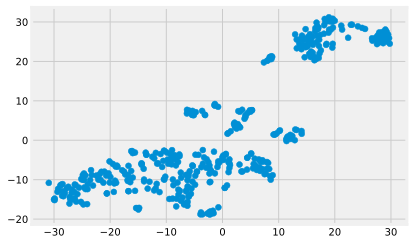

In [11]:
# постройка диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


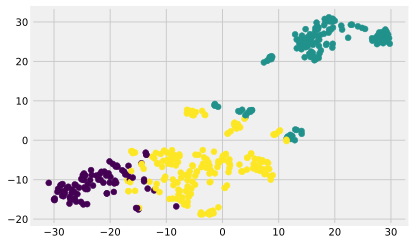

In [12]:
# разбивка данных на 3 кластера
# параметры: max_iter = 100, random_state = 42
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

# постройка диаграммы
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [13]:
# расчет средних значений price в разных кластерах 
print('Первый кластер: ', y_train[labels_train == 0].mean())
print('Второй кластер:', y_train[labels_train == 1].mean())
print('Третий кластер:', y_train[labels_train == 2].mean())


Первый кластер:  price    27.788372
dtype: float64
Второй кластер: price    16.165354
dtype: float64
Третий кластер: price    24.958115
dtype: float64


In [14]:
# расчет средних значений CRIM в разных кластерах 
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())


Первый кластер:  0.07356558139534884
Второй кластер: 10.797028425196851
Третий кластер: 0.4216602094240837


**\*Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [16]:
# масштабирование данные

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_tsne = tsne.fit_transform(X_test_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


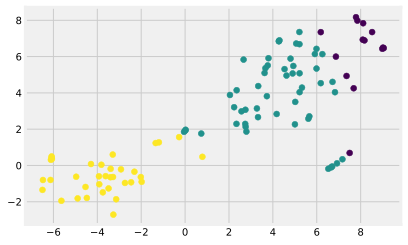

In [17]:
# применение и отображение 
labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()